## 地図を描く

[Cartopy](http://scitools.org.uk/cartopy/)を使って，地図を描いてみよう。[ドキュメント](http://scitools.org.uk/cartopy/docs/latest/installing.html#installing)に従ってインストールする。

```
> conda install -c conda-forge cartopy
```

### 海岸線を描く

緯度経度を地図の縦横とした地図投影法を[正距円筒図法](https://ja.wikipedia.org/wiki/正距円筒図法)（equidistant cylindrical projection, plate carrée）という。

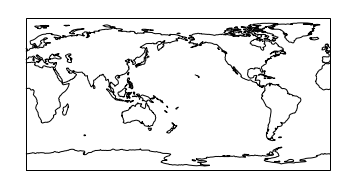

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

plt.show()

海岸線などデータをダウンロードしているときには，ピンクの背景でメッセージが表示されるが気にしなくてよい。緯線と経線を30度毎に引いてみる。

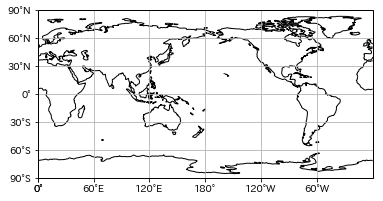

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines()

xticks = [0, 60, 120, 180, 240, 300, 360]
yticks = [-90, -60, -30, 0, 30, 60, 90]
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.gridlines(xlocs=xticks, ylocs=yticks)

plt.show()

### モルワイデ図法

[モルワイデ（Mollweide）図法](https://ja.wikipedia.org/wiki/モルワイデ図法)は，正積図法なので面積がどこでも等しい。今度は画像を貼ってみよう。

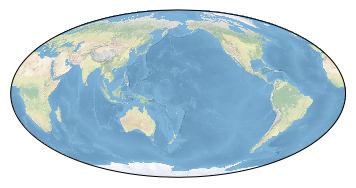

In [21]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180))
ax.stock_img()

plt.show()

### 国境

海陸を塗り分け，国境や湖，川を描いてみよう。投影には[正射図法](https://ja.wikipedia.org/wiki/正射図法)（orthographic projection）にする。

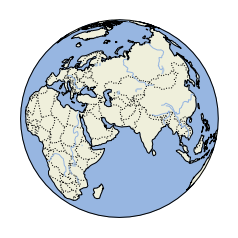

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ax = plt.axes(projection=ccrs.Orthographic(
    central_longitude=60,
    central_latitude =30))

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

plt.show()

### 県境

cartopy.features.BORDERSなどは，便利のため粗い解像度で定義されたものである。必要なものを自分で定義することもできる。県境を描いてみよう。

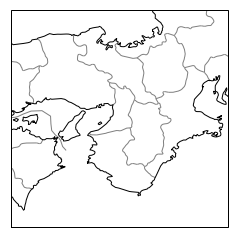

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ax = plt.axes(projection=ccrs.PlateCarree())

borders_10m = cfeature.NaturalEarthFeature(
    'cultural', 'admin_1_states_provinces_lines', '10m', \
    edgecolor='gray', facecolor='none')
ax.add_feature(borders_10m)
ax.coastlines('10m')

ax.set_extent([134, 137, 33, 36])

plt.show()

### 飛行ルート

航空機の経路は，最短距離である大円を基本としている。関西国際空港とサンフランシスコ国際空港とを二つの直線で結ぶ。一つは地図上の直線，もう一つは球面上の直線つまり大円である。

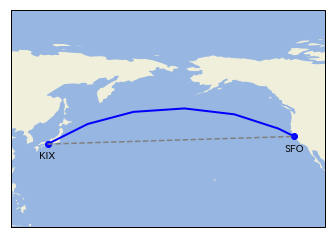

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

kix_lon, kix_lat = 135.232778, 34.434167
sfo_lon, sfo_lat = 237.375, 37.618889
lon = [kix_lon, sfo_lon]; lat = [kix_lat, sfo_lat]
dlat = 6

ax.set_extent([120, 250, 0, 90], ccrs.PlateCarree())

plt.plot(lon, lat, color='blue', linewidth=2, marker='o', transform=ccrs.Geodetic(),)
plt.plot(lon, lat, color='gray', linestyle='--', transform=ccrs.PlateCarree(),)
plt.text(kix_lon, kix_lat - dlat, 'KIX', horizontalalignment='center', transform=ccrs.Geodetic())
plt.text(sfo_lon, sfo_lat - dlat, 'SFO', horizontalalignment='center', transform=ccrs.Geodetic())

plt.show()